In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, r'C:\Users\Admin\Documents\before_github\SymSC_Python_Norm2')
from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse, MutualInductance, R
from FunctionCompiler import *

In [344]:
I_x1_value = 13
#I_in_value = I_x1_value/37.5

I_in_value = 3.5

I_x1 = Sine_current.Sine_current(loc=[1],A=I_x1_value,t0=200,length=800,w=0.05)
mutual_ind_1_1 = MutualInductance.MutualInductance(loc=[1,2,4,5],L1=1,L2=1,k=0.5)
mutual_ind_2_2 = MutualInductance.MutualInductance(loc=[2,3,5,6],L1=1,L2=1,k=0.5)
mutual_ind_34 = MutualInductance.MutualInductance(loc=[3,0,7,0],L1=10,L2=10.27,k=-0.5)

# DC/SFQ my
L5 = L.L(loc=[7,9],val=0.49)
L8 = L.L(loc=[9,0],val=1.236)
L4 = L.L(loc=[7,10],val=0.49)
Lp3 = L.L(loc=[8,11],val=0.26)
Lp2 = L.L(loc=[12,0],val=0.07)
L10 = L.L(loc=[11,13],val=0.08)
L6 = L.L(loc=[13,14],val=0.43)
L13 = L.L(loc=[14,15],val=0.66)
Lp4 = L.L(loc=[16,0],val=0.05)

J3 = JJ.JJ(loc=[9,8],A=1.37,c=1)
J2 = JJ.JJ(loc=[12,11],A=1.37,c=1)
J1 = JJ.JJ(loc=[10,13],A=1.18,c=1)
J4 = JJ.JJ(loc=[15,16],A=1.96,c=1)

Ib_add = Ib.Ib(loc=[14],val=1)

# AQFP buffer
I_in = Square_pulse.Square_pulse(loc=[5],A=I_in_value,t0=200,length=3*4*np.pi/0.1)
JJ_1 = JJ.JJ(loc=[4,0],A=1.6,c=1)
JJ_2 = JJ.JJ(loc=[6,0],A=1.6,c=1)
mutual_ind_qs = MutualInductance.MutualInductance(loc=[5,0,14,0],L1=3,L2=1.5,k=-0.529)

In [345]:
t = np.arange(0, 1300, 0.1)
fc = FunctionCompiler([I_x1, mutual_ind_1_1, mutual_ind_2_2, mutual_ind_34,L5, L8, L4, Lp3, Lp2, L10,L6,L13,Lp4,J3, J1, J2, J4, I_in, JJ_1, JJ_2,mutual_ind_qs],t)

sol = fc.solve()

Generated objects are: Sine_current1 MutualInductance1 MutualInductance2 MutualInductance3 L1 L2 L3 L4 L5 L6 L7 L8 L9 JJ1 JJ2 JJ3 JJ4 Square_pulse1 JJ5 JJ6 MutualInductance4


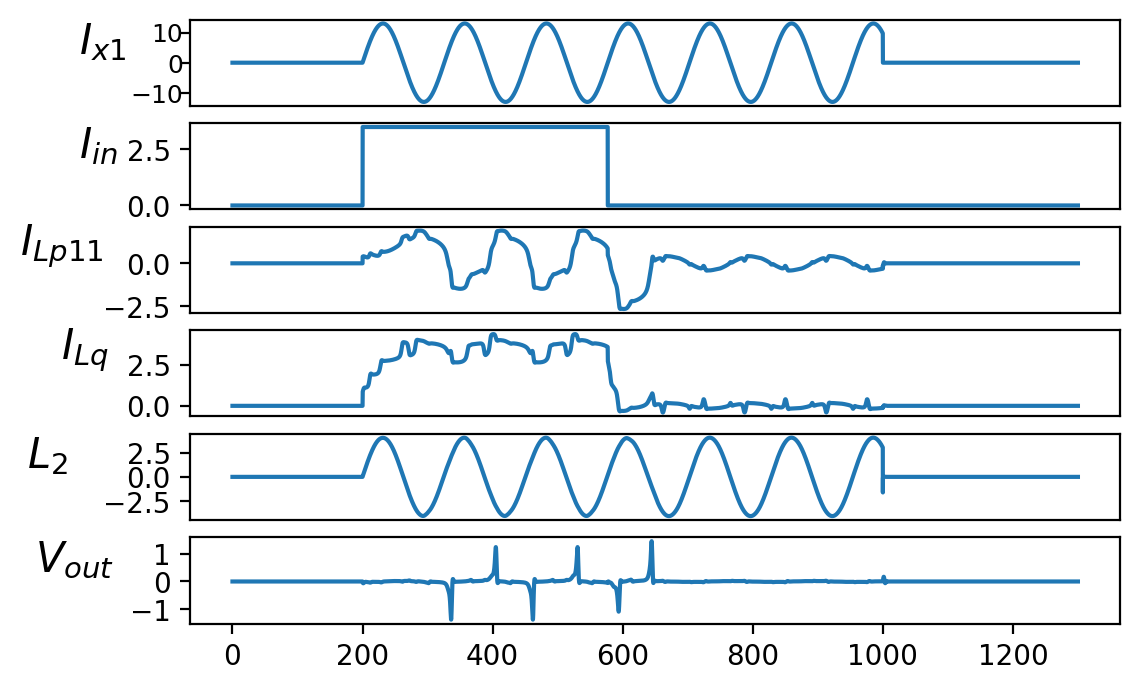

In [346]:
fig, ax = plt.subplots(nrows=6,ncols=1,dpi=200,gridspec_kw={'height_ratios': [40,40,40,40,40,40]})
# fig = plt.figure(constrained_layout=False)
# gs = fig.add_gridspec(nrows=6, ncols=1, left=0.05, right=0.48, wspace=0.05)

plt.subplot(6,1,1)
plt.ylabel('$I_{x1}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               pad = -1,    #  Расстояние между черточкой и ее подписью
               labelsize = 9)
plt.plot(t,I_x1.get_data("I",t,sol))

plt.subplot(6,1,2)
plt.ylabel('$I_{in}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
plt.plot(t,I_in.get_data("I",t,sol))

plt.subplot(6,1,3)
plt.ylabel('$I_{Lp11}$',rotation=0,fontsize=15,labelpad=15)
plt.xticks([])
plt.plot(t,mutual_ind_qs.get_data("I2",t,sol))

plt.subplot(6,1,4)
plt.ylabel('$I_{Lq}$',rotation=0,fontsize=15,labelpad=15)
plt.xticks([])
plt.plot(t,mutual_ind_qs.get_data("I1",t,sol))

plt.subplot(6,1,5)
plt.ylabel('$L_{2}$',rotation=0,fontsize=15,labelpad=20)
plt.xticks([])
plt.plot(t,mutual_ind_34.get_data("I2",t,sol))

plt.subplot(6,1,6)
plt.ylabel('$V_{out}$',rotation=0,fontsize=15,labelpad=20)
plt.plot(t,J4.get_data("V",t,sol))

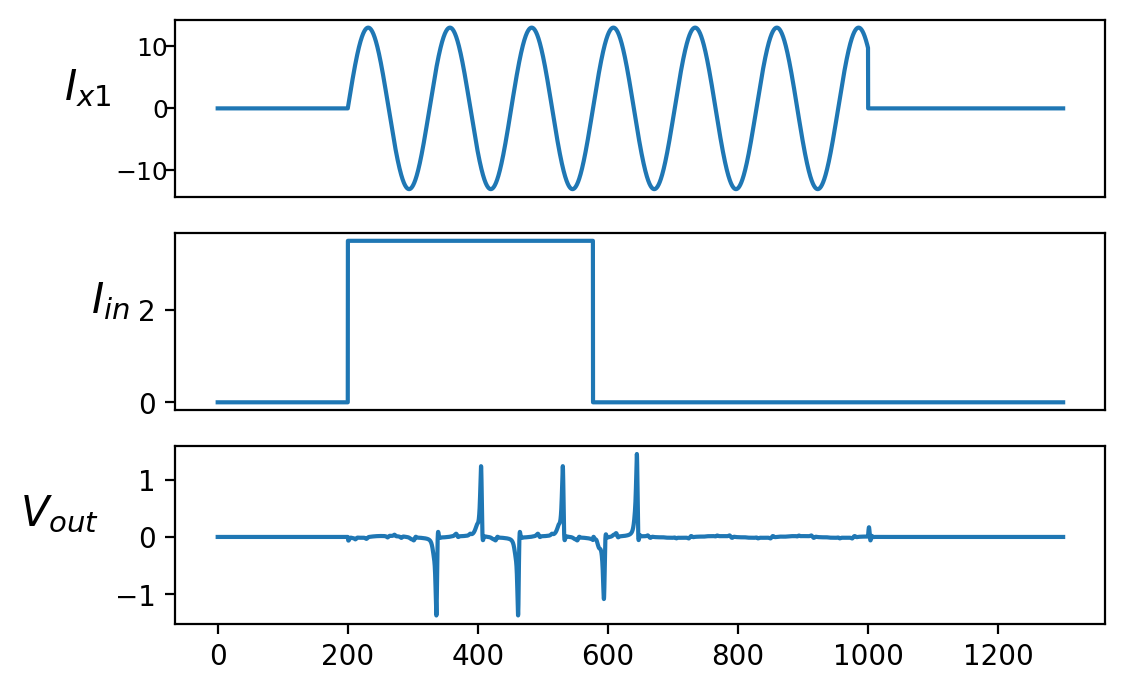

In [347]:
fig, ax = plt.subplots(nrows=3,ncols=1,dpi=200,gridspec_kw={'height_ratios': [40,40,40]})
# fig = plt.figure(constrained_layout=False)
# gs = fig.add_gridspec(nrows=6, ncols=1, left=0.05, right=0.48, wspace=0.05)

plt.subplot(3,1,1)
plt.ylabel('$I_{x1}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               pad = -1,    #  Расстояние между черточкой и ее подписью
               labelsize = 9)
plt.plot(t,I_x1.get_data("I",t,sol))

plt.subplot(3,1,2)
plt.ylabel('$I_{in}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
plt.plot(t,I_in.get_data("I",t,sol))

plt.subplot(3,1,3)
plt.ylabel('$V_{out}$',rotation=0,fontsize=15,labelpad=20)
plt.plot(t,J4.get_data("V",t,sol))

# Article Version

In [421]:
L_clk_value = 1
J_e2_value = 50/125 
J_clk_value = 1*0.25
J_3_value = 1.5

Ib_1_value = 1.5

J_upper_value = 1.5* 70/125
J_lower_value = 50/125 
L_s_value = 22/2.4
J_e1_value = 50/125
J_4_value = 1
Ib_2_value = 1
J_5_value = 1

In [422]:
# Input x1
I_x1_value = 2.5
I_in_value = 0.7

I_x1 = Sine_current.Sine_current(loc=[1],A=I_x1_value,t0=200,length=3000,w=0.05)

mutual_ind_1_1 = MutualInductance.MutualInductance(loc=[1,2,4,5],L1=1,L2=1,k=0.5)
mutual_ind_2_2 = MutualInductance.MutualInductance(loc=[2,3,5,6],L1=1,L2=1,k=0.5)
mutual_ind_34 = MutualInductance.MutualInductance(loc=[3,0,7,0],L1=1,L2=L_clk_value,k=-0.9)

# MC-dc/SFQ
#l4 = L.L(loc=[7,0],val=1)
JJ_e2 = JJ.JJ(loc=[7,8],A=J_e2_value,c=1)
JJ_clk = JJ.JJ(loc=[8,0],A=J_clk_value, c=1)
l5 = L.L(loc=[8,9],val=1)
l6 = L.L(loc=[9,10],val=1)
Ib1 = Ib.Ib(loc=[9],val=Ib_1_value)
JJ_3 = JJ.JJ(loc=[10,0],A=J_3_value,c=1)

J_upper = JJ.JJ(loc=[10,12],A=J_upper_value,c=1)

J_lower = JJ.JJ(loc=[12,0],A=J_lower_value, c=1)

l7 = L.L(loc=[12,13],val=1)
l8 = L.L(loc=[13,14],val=1)
J4 = JJ.JJ(loc=[13,0],A=1,c=J_4_value)
l9 = L.L(loc=[14,15],val=1)
J5 = JJ.JJ(loc=[15,0],A=J_5_value,c=1)
Ib2 = Ib.Ib(loc=[14],val=Ib_2_value)
#L_s = L.L(loc=[12,11],val=9.167)
J_e1 = JJ.JJ(loc=[11,0],A=J_e1_value, c=1)

# AQFP buffer
I_in = Square_pulse.Square_pulse(loc=[5],A=I_in_value,t0=200+6*np.pi/(2*0.1),length=2*4*np.pi/0.1)
JJ_1 = JJ.JJ(loc=[4,0],A=1.6,c=1)
JJ_2 = JJ.JJ(loc=[6,0],A=1.6,c=1)
mutual_ind_qs = MutualInductance.MutualInductance(loc=[5,0,12,11],L1=4,L2=L_s_value,k=-0.529)

# Main Lists
Input_X1 = np.array([I_x1,mutual_ind_1_1,mutual_ind_2_2,mutual_ind_34])
AQFP_buffer = np.array([I_in,JJ_1,JJ_2,mutual_ind_qs])
MC_dc_SFQ = np.array([JJ_e2,JJ_clk,l5,l6, Ib1, JJ_3, J_upper, J_lower, l7, l8,J4,l9,J5,Ib2,J_e1])

In [423]:
t = np.arange(0, 2000, 0.1)
fc = FunctionCompiler([*Input_X1, *AQFP_buffer, *MC_dc_SFQ],t)

sol = fc.solve()

Generated objects are: Sine_current1 MutualInductance1 MutualInductance2 MutualInductance3 Square_pulse1 JJ1 JJ2 MutualInductance4 JJ3 JJ4 L1 L2 Ib1 JJ5 JJ6 JJ7 L3 L4 JJ8 L5 JJ9 Ib2 JJ10


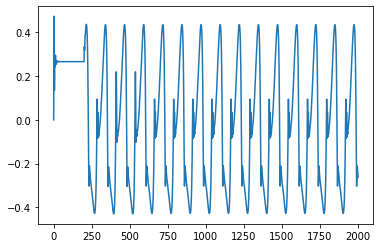

In [424]:
plt.plot(t,mutual_ind_34.get_data("I2",t,sol))

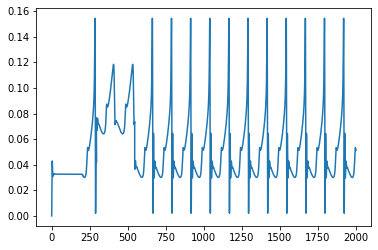

In [425]:
plt.plot(t,mutual_ind_qs.get_data("I2",t,sol))

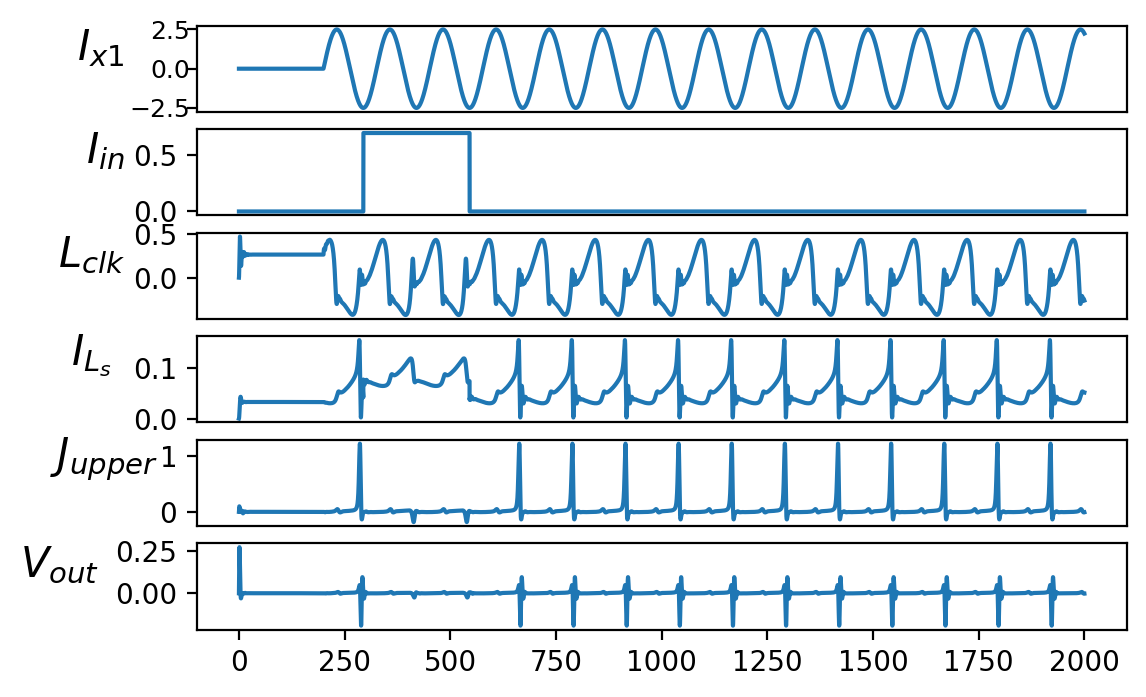

In [426]:
fig, ax = plt.subplots(nrows=6,ncols=1,dpi=200,gridspec_kw={'height_ratios': [40,40,40,40,40,40]})
# fig = plt.figure(constrained_layout=False)
# gs = fig.add_gridspec(nrows=6, ncols=1, left=0.05, right=0.48, wspace=0.05)

plt.subplot(6,1,1)
plt.ylabel('$I_{x1}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               pad = -1,    #  Расстояние между черточкой и ее подписью
               labelsize = 9)
plt.plot(t,I_x1.get_data("I",t,sol))

plt.subplot(6,1,2)
plt.ylabel('$I_{in}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
plt.plot(t,I_in.get_data("I",t,sol))

plt.subplot(6,1,3)
plt.ylabel('$L_{clk}$',rotation=0,fontsize=15,labelpad=15)
plt.xticks([])
plt.plot(t,mutual_ind_34.get_data("I2",t,sol))

plt.subplot(6,1,4)
plt.ylabel('$I_{L_s}$',rotation=0,fontsize=15,labelpad=15)
plt.xticks([])
plt.plot(t,mutual_ind_qs.get_data("I2",t,sol))

plt.subplot(6,1,5)
plt.ylabel('$J_{upper}$',rotation=0,fontsize=15,labelpad=20)
plt.xticks([])
plt.plot(t,J_upper.get_data("V",t,sol))

plt.subplot(6,1,6)
plt.ylabel('$V_{out}$',rotation=0,fontsize=15,labelpad=20)
plt.plot(t,J5.get_data("V",t,sol))